# 1. 선형 회귀 실습
* 옛날 과학자들을 자연현상을 설명하기 위해 많은 모델들을 고려했는데 이 세상이 선형 관계가 있다고 가정하고 문제를 풀기 시작

![](https://i.imgur.com/dm45lry.png)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 같은 결과가 나오도록 랜덤 시드를 사
torch.manual_seed(10)

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [4]:
import matplotlib.pyplot as plt

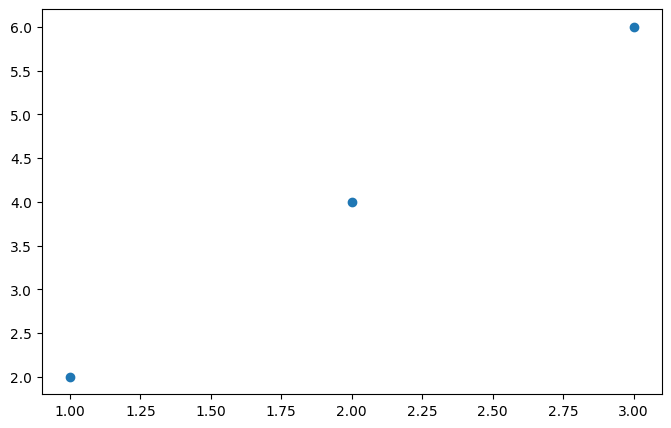

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)

### 가설 세우기
* H(x) = Wx + b
* 어떤 데이터에 맞춰 모델을 정의할 때, 사용하는 공식을 가설(Hypothesis)라고 함
* 가설은 임의로 추측해서 세워보는 식일수도 있고, 경험적으로 알고 있는 식일수도 있음 → 맞는 가설이라 아니라고 판단되면 계속 수정해나가게 되는 식

In [6]:
model = nn.Linear(1, 1)
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [7]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


### 비용 함수
* Cost function = Loss function

In [8]:
y_pred = model(x_train)
print(y_pred)

tensor([[-0.1181],
        [-0.2019],
        [-0.2858]], grad_fn=<AddmmBackward0>)


In [9]:
((y_pred - y_train) ** 2).mean()

tensor(20.5513, grad_fn=<MeanBackward0>)

In [10]:
loss = nn.MSELoss()(y_pred, y_train)
print(loss)

tensor(20.5513, grad_fn=<MseLossBackward0>)


### 경사하강법(Gradient Descent)
* 비용함수의 값을 최소로 하는 W와 b를 찾는 방법을 찾기 위한 알고리즘 → 옵티마이저(Optimizer), 최적화 알고리즘
* 옵티마이저 알고리즘을 통해 적절한 W와 b를 찾아내는 과정을 학습(훈련)이라고 부름

![](https://i.imgur.com/P2YeLUs.png)

* H(x) = Wx

![](https://i.imgur.com/0fW4LTG.png)

* 경사하강법은 임의의 초기값 W값을 정한 뒤에, 맨 아래의 볼록한 부분의 W값을 향해 점차 W의 값을 수정해나가는 것이 목표

### 학습률(Learning rate)
* 한 번 움직이는 거리

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [12]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


### 오차 보정하기

In [13]:
# loss 계산
loss = nn.MSELoss()(y_pred, y_train)

# gradient를 0으로 초기화
optimizer.zero_grad()

# 비용 함수를 미분하여 gradient(기울기) 계산
loss.backward() # backword 연산(역전파)

# W와 b를 업데이트
optimizer.step()

In [14]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.1120]], requires_grad=True), Parameter containing:
tensor([0.0498], requires_grad=True)]


### 반복 학습
* 학습을 반복하면서 틀린 부분을 수정하여 오차를 계속 줄여나감
* epochs : 반복 학습 횟수

In [15]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)

    loss = nn.MSELoss()(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs} Loss : {loss : .6f}')

Epoch 0/1000 Loss :  16.260735
Epoch 100/1000 Loss :  0.048222
Epoch 200/1000 Loss :  0.029798
Epoch 300/1000 Loss :  0.018414
Epoch 400/1000 Loss :  0.011378
Epoch 500/1000 Loss :  0.007031
Epoch 600/1000 Loss :  0.004345
Epoch 700/1000 Loss :  0.002685
Epoch 800/1000 Loss :  0.001659
Epoch 900/1000 Loss :  0.001025
Epoch 1000/1000 Loss :  0.000634


# 최종 파라미터 확인

In [16]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9708]], requires_grad=True), Parameter containing:
tensor([0.0663], requires_grad=True)]


* f(x) = 1.9708x + 0.0663

### 테스트

In [17]:
x_test = torch.FloatTensor([[10], [13]])
y_pred = model(x_test)
print(y_pred)

tensor([[19.7747],
        [25.6872]], grad_fn=<AddmmBackward0>)


# 2. 다중 선형 회귀
* 여러 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [18]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
torch.Size([5, 3])
tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.]])
torch.Size([5, 1])


* H(x) = W1x1 + W2x2 + W3x3 + b

In [19]:
model = nn.Linear(3, 1)
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [20]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2165,  0.1328, -0.3303]], requires_grad=True), Parameter containing:
tensor([-0.1018], requires_grad=True)]


In [21]:
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [22]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)

    loss = nn.MSELoss()(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs} Loss : {loss : .6f}')

Epoch 0/1000 Loss :  43266.148438
Epoch 100/1000 Loss :  4.803024
Epoch 200/1000 Loss :  4.560738
Epoch 300/1000 Loss :  4.331190
Epoch 400/1000 Loss :  4.113773
Epoch 500/1000 Loss :  3.907800
Epoch 600/1000 Loss :  3.712666
Epoch 700/1000 Loss :  3.527837
Epoch 800/1000 Loss :  3.352756
Epoch 900/1000 Loss :  3.186870
Epoch 1000/1000 Loss :  3.029752


In [23]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.6800, 0.8300, 0.5040]], requires_grad=True), Parameter containing:
tensor([-0.0911], requires_grad=True)]


In [24]:
x_test = torch.FloatTensor([[82, 92, 82]])
y_pred = model(x_test)
print(y_pred)

tensor([[173.3595]], grad_fn=<AddmmBackward0>)


# 3. 논리 회귀 실습
* 예) 공부한 시간에 따른 시험 합격 여부를 예측하기
* 직선 하나(선형 회귀)를 사용해서 예측한다면 제대로 예측할 수 없음

![](https://i.imgur.com/nE29yVL.png)

* 시그모이드 함수를 사용하면 제대로 예측할 수 있음
* 예측값을 0에서 1사이의 값이 되도록 만듦
* 0에서 1사이의 연속된 값을 출력하기 때문에 보통 0.5를 기준으로 예측값을 구분
    - 예측값이 0.5보다 작음 = 0 → 불합격
    - 예측값이 0.5보다 큼 = 1 → 합격
* 논리 회귀는 분류를 할 때, 사용하고 선형 회귀 공식으로부터 나왔기 때문에 논리 회귀라는 이름이 붙여짐
![](https://i.imgur.com/guvMfkf.png)

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(1)

In [26]:
x_train = torch.FloatTensor([[0], [1], [3], [5], [9], [11], [15], [20]])
y_train = torch.FloatTensor([[0], [0], [0], [0], [0], [1], [1], [1]])
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 1])
torch.Size([8, 1])


In [27]:
import matplotlib.pyplot as plt


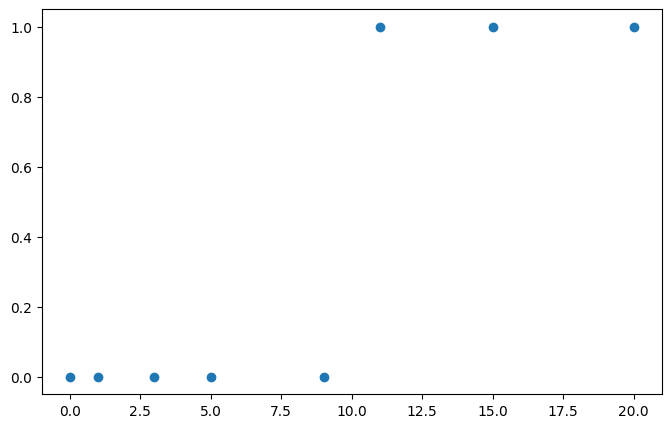

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)

### 가설
![](https://i.imgur.com/6NsfKMa.png)

In [29]:
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [30]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


### 비용 함수
* Binary Cross Entropy
* 논리 회귀에서는 nn.BCELoss() 함수를 사용하여 loss를 계산
<img src="https://i.imgur.com/tvCuEmh.png" width="600px">

In [31]:
y_pred = model(x_train)
print(y_pred)

tensor([[0.3914],
        [0.5185],
        [0.7511],
        [0.8943],
        [0.9852],
        [0.9947],
        [0.9993],
        [0.9999]], grad_fn=<SigmoidBackward0>)


In [32]:
loss = nn.BCELoss()(y_pred, y_train)
print(loss)

tensor(1.1352, grad_fn=<BinaryCrossEntropyBackward0>)


### 옵티마이저

In [34]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 학습

In [35]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.BCELoss()(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs} Loss: {loss:.6f}')

Epoch 0/1000 Loss: 1.135221
Epoch 100/1000 Loss: 0.479488
Epoch 200/1000 Loss: 0.445477
Epoch 300/1000 Loss: 0.416795
Epoch 400/1000 Loss: 0.392397
Epoch 500/1000 Loss: 0.371461
Epoch 600/1000 Loss: 0.353344
Epoch 700/1000 Loss: 0.337538
Epoch 800/1000 Loss: 0.323646
Epoch 900/1000 Loss: 0.311348
Epoch 1000/1000 Loss: 0.300392


In [36]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2353]], requires_grad=True), Parameter containing:
tensor([-1.9280], requires_grad=True)]


### 테스트

In [37]:
x_test = torch.FloatTensor([[2.5], [15.5]])
y_pred = model(x_test)

print(y_pred)

tensor([[0.2075],
        [0.8479]], grad_fn=<SigmoidBackward0>)


### 임계치 설정하기
* 0.5보다 크거나 같으면 1 (Pass)
* 0.5보다 작으면 0 (Fail)

In [38]:
y_bool = (y_pred >= 0.5).float()
print(y_bool)

tensor([[0.],
        [1.]])


# 4. 다항 논리 회귀

In [39]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [0, 0, 0, 1, 1, 1, 2, 2]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


### 원 핫 인코딩
* 다항 분류 문제를 풀 때, 출력값의 형태를 가장 깔끔하게 표현할 수 있는 방법
* 여러개의 항을 0과 1로 표현

![](https://i.imgur.com/Jn95kLk.png)

* 원 핫 인코딩 활용 방법
    1. 클래스(라벨)의 개수만큼 배열을 0으로 채움
    2. 각 클래스의 인덱스 위치를 정함
    3. 각 클래스에 해당하는 인덱스에 1을 넣음

In [40]:
y_one_hot = nn.functional.one_hot(y_train, num_classes=3).float()
print(y_one_hot)

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])


### 모델 정의
* 4개의 입력을 받아서 3개의 출력이 나옴
* 다항 논리 회귀에서는 시그모이드 함수 대신 소프트맥스 함수를 사용 (소프트맥스 함수 : 출력을 다 더하면 1이 되는 함수)
* 모델을 코드로 정의할 때는 소프트맥스 함수를 생략하는 경우가 있음 (nn.CrossEntropyLoss()에 소프트맥스 함수가 포함)

In [41]:
model = nn.Sequential(
    nn.Linear(4, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


### 비용 함수

In [42]:
y_pred = model(x_train)
print(y_pred)

tensor([[ 0.1651,  0.3692,  0.2482],
        [-0.8081,  0.0897,  0.5326],
        [-0.3053, -0.1356,  0.2816],
        [-1.0438, -0.1607,  0.5907],
        [ 0.6551,  1.6742,  0.3226],
        [-0.2185,  0.3411,  0.0045],
        [ 0.2496,  1.4281,  0.2857],
        [ 0.3134,  1.6907,  0.2982]], grad_fn=<AddmmBackward0>)


In [43]:
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(1.3204, grad_fn=<NllLossBackward0>)


### 옵티마이저

In [46]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

### 학습

In [47]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs} Loss: {loss:.6f}')

Epoch 0/1000 Loss: 1.320398
Epoch 100/1000 Loss: 0.637820
Epoch 200/1000 Loss: 0.550975
Epoch 300/1000 Loss: 0.496238
Epoch 400/1000 Loss: 0.452070
Epoch 500/1000 Loss: 0.412791
Epoch 600/1000 Loss: 0.375892
Epoch 700/1000 Loss: 0.339805
Epoch 800/1000 Loss: 0.303406
Epoch 900/1000 Loss: 0.266848
Epoch 1000/1000 Loss: 0.240685


### 테스트

In [48]:
x_test = torch.FloatTensor([[1, 2, 5, 6]])
y_pred = model(x_test)
print(y_pred)

tensor([[-5.0585,  3.2932,  1.8924]], grad_fn=<AddmmBackward0>)


### 예측값과 확률 구하기

In [49]:
y_prob = nn.Softmax(1)(y_pred)
print(y_prob)

tensor([[1.8930e-04, 8.0216e-01, 1.9765e-01]], grad_fn=<SoftmaxBackward0>)


In [50]:
print(f'0일 확률: {y_prob[0][0]:.2f}')
print(f'1일 확률: {y_prob[0][1]:.2f}')
print(f'2일 확률: {y_prob[0][2]:.2f}')

0일 확률: 0.00
1일 확률: 0.80
2일 확률: 0.20


### 확률이 높은 인덱스 찾기

In [51]:
torch.argmax(y_prob, axis=1)

tensor([1])